# Intro 

Load the Gas retrievals from ORACLES 2016 and 2017 and make a few figures

# Load the python modules and set up paths

In [1]:
%config InlineBackend.rc = {}
import matplotlib 
import os
matplotlib.rc_file(os.path.join(os.getcwd(),'file.rc'))
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import Sp_parameters as Sp
from load_utils import mat2py_time, toutc, load_ict
from Sp_parameters import smooth
from linfit import linfit
from path_utils import getpath
from plotting_utils import make_boxplot

In [118]:
from mpl_toolkits.basemap import Basemap

In [38]:
import hdf5storage as hs

In [68]:
import scipy.stats as st
import Sun_utils as su

In [2]:
%matplotlib notebook

In [3]:
fp =getpath('ORACLES')#'C:/Userds/sleblan2/Research/ORACLES/'
fp

u'/mnt/c/Users/sleblanc/Research/ORACLES/'

# Load the files

## Load the 2016 files

In [29]:
days6 = ['824','825','827','830','831','902','904','906','908','910','912','914','918','920','924','925','927','929','930']

In [30]:
v6 = 'R1'
outgas6 = []
outgas6_head = []
for i,d in enumerate(days6):
    try:
        print 'Doing day: {}'.format(d)
        fname_aod = fp+'/gas_ict/4STAR-GAS_P3_20160{}_{vv}.ict'.format(d,vv=v6)
        tt,th = load_ict(fname_aod,return_header=True)
    except:
        print '*** Problem with day: {} *** Skipping '.format(d)
        days.pop(i)
        continue
    
    outgas6.append(tt)
    outgas6_head.append(th)

Doing day: 824
('Start_UTC', 'Latitude', 'Longitude', 'GPS_Alt', 'amass_O3', 'amass_NO2', 'CWV', 'std_CWV', 'QA_CWV', 'VCD_O3', 'resid_O3', 'QA_O3', 'VCD_NO2', 'resid_NO2', 'QA_NO2', 'VCD_HCOH', 'resid_HCOH', 'QA_HCOH')
Doing day: 825
('Start_UTC', 'Latitude', 'Longitude', 'GPS_Alt', 'amass_O3', 'amass_NO2', 'CWV', 'std_CWV', 'QA_CWV', 'VCD_O3', 'resid_O3', 'QA_O3', 'VCD_NO2', 'resid_NO2', 'QA_NO2', 'VCD_HCOH', 'resid_HCOH', 'QA_HCOH')
Doing day: 827
('Start_UTC', 'Latitude', 'Longitude', 'GPS_Alt', 'amass_O3', 'amass_NO2', 'CWV', 'std_CWV', 'QA_CWV', 'VCD_O3', 'resid_O3', 'QA_O3', 'VCD_NO2', 'resid_NO2', 'QA_NO2', 'VCD_HCOH', 'resid_HCOH', 'QA_HCOH')
Doing day: 830
('Start_UTC', 'Latitude', 'Longitude', 'GPS_Alt', 'amass_O3', 'amass_NO2', 'CWV', 'std_CWV', 'QA_CWV', 'VCD_O3', 'resid_O3', 'QA_O3', 'VCD_NO2', 'resid_NO2', 'QA_NO2', 'VCD_HCOH', 'resid_HCOH', 'QA_HCOH')
Doing day: 831
('Start_UTC', 'Latitude', 'Longitude', 'GPS_Alt', 'amass_O3', 'amass_NO2', 'CWV', 'std_CWV', 'QA_CWV', 'V

In [32]:
nm6 = outgas6[0].dtype.names

### Save into a single array

In [93]:
ar6 = {}
for n in nm6:
    ar6[n] = np.array([])

In [94]:
ar6['idays'] = np.array([])
ar6['days'] = np.array([])

In [95]:
for i,d in enumerate(days6):
    ar6['idays'] = np.append(ar6['idays'],np.zeros_like(outgas6[i]['Start_UTC'])+i)
    ar6['days'] = np.append(ar6['days'],np.zeros_like(outgas6[i]['Start_UTC'])+float(d))
    for n in nm6:
        ar6[n] = np.append(ar6[n],outgas6[i][n])

In [96]:
len(ar6['days'])

516204

In [39]:
hs.savemat(fp+'/gas_ict/all_gas_ict_{vv}_2016.mat'.format(vv=v6),ar6)

## Load the 2017 files

In [16]:
days = ['20170801','20170802','20170807','20170809', '20170812','20170813',
        '20170815','20170817','20170818','20170819','20170821',
        '20170824','20170826','20170828','20170830','20170831','20170902','20170903','20170904']

In [17]:
vv = 'R0'

In [18]:
outgas = []
outgas_head = []
for i,d in enumerate(days):
    try:
        print 'Doing day: {}'.format(d)
        fname_aod = fp+'/gas_ict_2017/4STAR-GAS_P3_{}_{vv}.ict'.format(d,vv=vv)
        tt,th = load_ict(fname_aod,return_header=True)
    except:
        print '*** Problem with day: {} *** Skipping '.format(d)
        days.pop(i)
        continue
    
    outgas.append(tt)
    outgas_head.append(th)

Doing day: 20170801
('Start_UTC', 'Latitude', 'Longitude', 'GPS_Alt', 'amass_O3', 'amass_NO2', 'CWV', 'std_CWV', 'QA_CWV', 'VCD_O3', 'resid_O3', 'QA_O3', 'VCD_NO2', 'resid_NO2', 'QA_NO2', 'VCD_HCOH', 'resid_HCOH', 'QA_HCOH')
Doing day: 20170802
*** Problem with day: 20170802 *** Skipping 
Doing day: 20170809
('Start_UTC', 'Latitude', 'Longitude', 'GPS_Alt', 'amass_O3', 'amass_NO2', 'CWV', 'std_CWV', 'QA_CWV', 'VCD_O3', 'resid_O3', 'QA_O3', 'VCD_NO2', 'resid_NO2', 'QA_NO2', 'VCD_HCOH', 'resid_HCOH', 'QA_HCOH')
Doing day: 20170812
('Start_UTC', 'Latitude', 'Longitude', 'GPS_Alt', 'amass_O3', 'amass_NO2', 'CWV', 'std_CWV', 'QA_CWV', 'VCD_O3', 'resid_O3', 'QA_O3', 'VCD_NO2', 'resid_NO2', 'QA_NO2', 'VCD_HCOH', 'resid_HCOH', 'QA_HCOH')
Doing day: 20170813
('Start_UTC', 'Latitude', 'Longitude', 'GPS_Alt', 'amass_O3', 'amass_NO2', 'CWV', 'std_CWV', 'QA_CWV', 'VCD_O3', 'resid_O3', 'QA_O3', 'VCD_NO2', 'resid_NO2', 'QA_NO2', 'VCD_HCOH', 'resid_HCOH', 'QA_HCOH')
Doing day: 20170815
('Start_UTC', '

In [20]:
outgas_head[0]

['51, 1001\n',
 'Jens Redemann\n',
 'NASA Ames Research Center\n',
 'Spectrometers for Sky-Scanning, Sun-Tracking Atmospheric Research (4STAR)\n',
 'ORACLES 2017\n',
 '1, 1\n',
 '2017, 08, 01, 2017, 09, 11\n',
 '1\n',
 'Start_UTC, seconds, Elapsed seconds from 0 hours UT on day: 20170801\n',
 '17\n',
 '1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n',
 ' -99999.0000000, -99999.0000000, -99999.0, -99999.00, -99999.00, -99999.000, -99999.000, -99999, -99999.00, -99999.000, -99999, -99999.000, -99999.00000, -99999, -99999.000, -99999.00000, -99999\n',
 'Latitude, deg, Aircraft latitude (deg) at the indicated time\n',
 'Longitude, deg, Aircraft longitude (deg) at the indicated time\n',
 'GPS_Alt, m, Aircraft GPS geometric altitude (m) at the indicated time\n',
 'amass_O3, unitless, ozone optical airmass\n',
 'amass_NO2, unitless, NO2 optical airmass\n',
 'CWV, g/cm^2, column water vapor calculated as average of values retrieved in 940-960 nm band\n',
 'std_CWV, g/cm^2, standard deviati

In [19]:
len(outgas)

17

In [23]:
nm = outgas[0].dtype.names

### Combine data into single array

In [40]:
ar = {}
for n in nm:
    ar[n] = np.array([])

In [41]:
ar['idays'] = np.array([])
ar['days'] = np.array([])

In [42]:
for i,d in enumerate(days):
    ar['idays'] = np.append(ar['idays'],np.zeros_like(outgas[i]['Start_UTC'])+i)
    ar['days'] = np.append(ar['days'],np.zeros_like(outgas[i]['Start_UTC'])+float(d))
    for n in nm:
        ar[n] = np.append(ar[n],outgas[i][n])

In [43]:
hs.savemat(fp+'/gas_ict_2017/all_gas_ict_{vv}_2017.mat'.format(vv=vv),ar)

In [45]:
ar.keys()

['days',
 'amass_NO2',
 'VCD_O3',
 'amass_O3',
 'idays',
 'VCD_NO2',
 'Start_UTC',
 'QA_NO2',
 'QA_HCOH',
 'std_CWV',
 'Longitude',
 'CWV',
 'resid_NO2',
 'VCD_HCOH',
 'GPS_Alt',
 'Latitude',
 'QA_CWV',
 'QA_O3',
 'resid_HCOH',
 'resid_O3']

## Flag by altitude

In [53]:
ar['fla'] = (ar['GPS_Alt']>600.0) & (ar['GPS_Alt']<1800.0)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


In [99]:
ar6['fla'] = (ar6['GPS_Alt']>600.0) & (ar6['GPS_Alt']<1800.0)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


In [55]:
ar['fl_O3'] = (ar['QA_O3']==0) & ar['fla']
ar['fl_CWV'] = (ar['QA_CWV']==0) & ar['fla']
ar['fl_HCOH'] = (ar['QA_HCOH']==0) & ar['fla']
ar['fl_NO2'] = (ar['QA_NO2']==0) & ar['fla']

In [100]:
ar6['fl_O3'] = (ar6['QA_O3']==0) & ar6['fla']
ar6['fl_CWV'] = (ar6['QA_CWV']==0) & ar6['fla']
ar6['fl_HCOH'] = (ar6['QA_HCOH']==0) & ar6['fla']
ar6['fl_NO2'] = (ar6['QA_NO2']==0) & ar6['fla']

# Now plot the statistics

In [44]:
from plotting_utils import prelim

## Plot some histogram

<IPython.core.display.Javascript object>


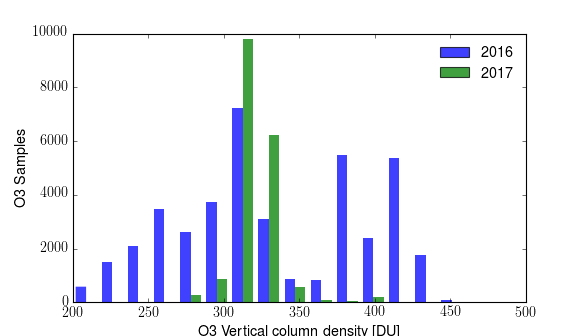

In [169]:
plt.figure()
plt.hist([ar6['VCD_O3'][ar6['fl_O3']],ar['VCD_O3'][ar['fl_O3']]*1.2],
         bins=15,label=['2016','2017'],edgecolor='None',alpha=0.75,normed=False)
plt.legend(frameon=False)
plt.xlabel('O3 Vertical column density [DU]')
plt.ylabel('O3 Samples')

<IPython.core.display.Javascript object>


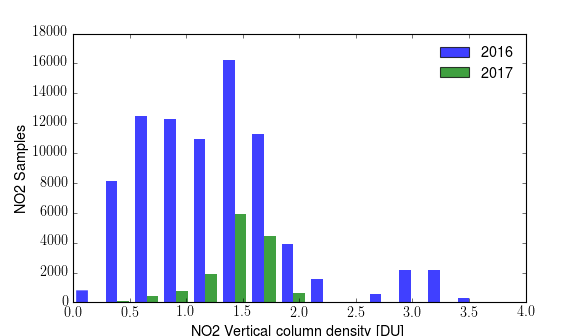

In [58]:
plt.figure()
plt.hist([ar6['VCD_NO2'][ar6['fl_NO2']],ar['VCD_NO2'][ar['fl_NO2']]],
         bins=15,label=['2016','2017'],edgecolor='None',alpha=0.75,normed=False)
plt.legend(frameon=False)
plt.xlabel('NO2 Vertical column density [DU]')
plt.ylabel('NO2 Samples')

In [63]:
np.nanmin(ar['CWV'][ar['fl_CWV']])

0.041000000000000002

<IPython.core.display.Javascript object>


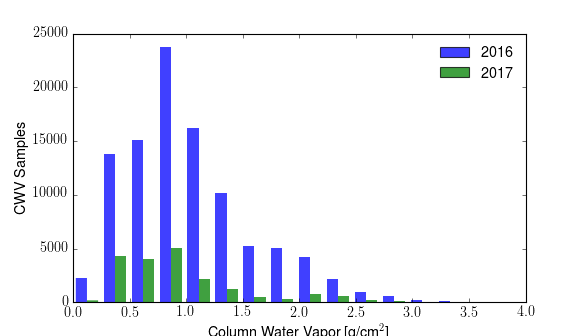

/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


In [64]:
plt.figure()
plt.hist([ar6['CWV'][ar6['fl_CWV']],ar['CWV'][ar['fl_CWV']]],
         bins=15,range=[0,3.7],label=['2016','2017'],edgecolor='None',alpha=0.75,normed=False)
plt.legend(frameon=False)
plt.xlabel('Column Water Vapor [g/cm$^2$]')
plt.ylabel('CWV Samples')

<IPython.core.display.Javascript object>


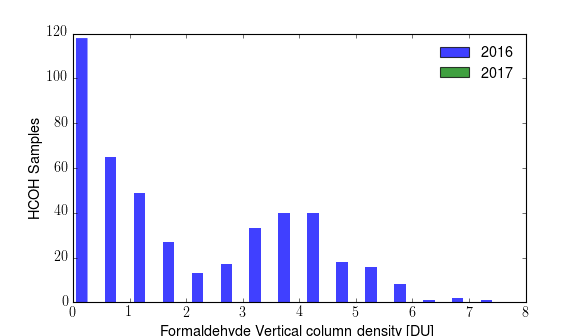

In [66]:
plt.figure()
plt.hist([ar6['VCD_HCOH'][ar6['fl_HCOH']],ar['VCD_HCOH'][ar['fl_HCOH']]],
         bins=15,label=['2016','2017'],edgecolor='None',alpha=0.75,normed=False)
plt.legend(frameon=False)
plt.xlabel('Formaldehyde Vertical column density [DU]')
plt.ylabel('HCOH Samples')

## Prep statistics for 2d histograms on a map

In [67]:
sta_o3,sta6_o3 = {},{}
sta_no2,sta6_no2 = {},{}
sta_cwv,sta6_cwv = {},{}

In [184]:
sta_o3['mean'],sta_o3['x'],sta_o3['y'],sta_o3['bin'] = st.binned_statistic_2d(ar['Latitude'][ar['fl_O3']],
                                    ar['Longitude'][ar['fl_O3']],ar['VCD_O3'][ar['fl_O3']]*1.3,bins=26,range=[[-15,2],[-16,8]])
sta_o3['mean'] = np.ma.masked_array(sta_o3['mean'],np.isnan(sta_o3['mean']))
sta_no2['mean'],sta_no2['x'],sta_no2['y'],sta_no2['bin'] = st.binned_statistic_2d(ar['Latitude'][ar['fl_NO2']],
                                    ar['Longitude'][ar['fl_NO2']],ar['VCD_NO2'][ar['fl_NO2']],bins=26,range=[[-15,2],[-16,8]])
sta_no2['mean'] = np.ma.masked_array(sta_no2['mean'],np.isnan(sta_no2['mean']))
sta_cwv['mean'],sta_cwv['x'],sta_cwv['y'],sta_cwv['bin'] = st.binned_statistic_2d(ar['Latitude'][ar['fl_CWV']],
                                    ar['Longitude'][ar['fl_CWV']],ar['CWV'][ar['fl_CWV']],bins=26,range=[[-15,2],[-16,8]])
sta_cwv['mean'] = np.ma.masked_array(sta_cwv['mean'],np.isnan(sta_cwv['mean']))

In [170]:
sta_o3['std'],sta_o3['x'],sta_o3['y'],sta_o3['bin'] = st.binned_statistic_2d(ar['Latitude'][ar['fl_O3']],
                       ar['Longitude'][ar['fl_O3']],ar['VCD_O3'][ar['fl_O3']],bins=26,range=[[-15,2],[-16,8]],statistic=np.std)
sta_o3['std'] = np.ma.masked_array(sta_o3['std'],np.isnan(sta_o3['std']))
sta_no2['std'],sta_no2['x'],sta_no2['y'],sta_no2['bin'] = st.binned_statistic_2d(ar['Latitude'][ar['fl_NO2']],
                       ar['Longitude'][ar['fl_NO2']],ar['VCD_NO2'][ar['fl_NO2']],bins=26,range=[[-15,2],[-16,8]],statistic=np.std)
sta_no2['std'] = np.ma.masked_array(sta_no2['std'],np.isnan(sta_no2['std']))
sta_cwv['std'],sta_cwv['x'],sta_cwv['y'],sta_cwv['bin'] = st.binned_statistic_2d(ar['Latitude'][ar['fl_CWV']],
                       ar['Longitude'][ar['fl_CWV']],ar['CWV'][ar['fl_CWV']],bins=26,range=[[-15,2],[-16,8]],statistic=np.std)
sta_cwv['std'] = np.ma.masked_array(sta_cwv['std'],np.isnan(sta_cwv['std']))

In [73]:
uniq_cnt = lambda x: len(np.unique(x))

In [74]:
sta_o3['dcnt'],sta_o3['x'],sta_o3['y'],sta_o3['bin'] = st.binned_statistic_2d(ar['Latitude'][ar['fl_O3']],
                       ar['Longitude'][ar['fl_O3']],ar['days'][ar['fl_O3']],bins=26,range=[[-15,2],[-16,8]],statistic=uniq_cnt)
sta_o3['dcnt'] = np.ma.masked_array(sta_o3['dcnt'],np.isnan(sta_o3['dcnt']))
sta_no2['dcnt'],sta_no2['x'],sta_no2['y'],sta_no2['bin'] = st.binned_statistic_2d(ar['Latitude'][ar['fl_NO2']],
                       ar['Longitude'][ar['fl_NO2']],ar['days'][ar['fl_NO2']],bins=26,range=[[-15,2],[-16,8]],statistic=uniq_cnt)
sta_no2['dcnt'] = np.ma.masked_array(sta_no2['dcnt'],np.isnan(sta_no2['dcnt']))
sta_cwv['dcnt'],sta_cwv['x'],sta_cwv['y'],sta_cwv['bin'] = st.binned_statistic_2d(ar['Latitude'][ar['fl_CWV']],
                       ar['Longitude'][ar['fl_CWV']],ar['days'][ar['fl_CWV']],bins=26,range=[[-15,2],[-16,8]],statistic=uniq_cnt)
sta_cwv['dcnt'] = np.ma.masked_array(sta_cwv['dcnt'],np.isnan(sta_cwv['dcnt']))

In [175]:
sta6_o3['mean'],sta6_o3['x'],sta6_o3['y'],sta6_o3['bin'] = st.binned_statistic_2d(ar6['Latitude'][ar6['fl_O3']],
                                    ar6['Longitude'][ar6['fl_O3']],ar6['VCD_O3'][ar6['fl_O3']]*0.9,bins=26,range=[[-25,-8],[0,16]])
sta6_o3['mean'] = np.ma.masked_array(sta6_o3['mean'],np.isnan(sta6_o3['mean']))
sta6_no2['mean'],sta6_no2['x'],sta6_no2['y'],sta6_no2['bin'] = st.binned_statistic_2d(ar6['Latitude'][ar6['fl_NO2']],
                                    ar6['Longitude'][ar6['fl_NO2']],ar6['VCD_NO2'][ar6['fl_NO2']],bins=26,range=[[-25,-8],[0,16]])
sta6_no2['mean'] = np.ma.masked_array(sta6_no2['mean'],np.isnan(sta6_no2['mean']))
sta6_cwv['mean'],sta6_cwv['x'],sta6_cwv['y'],sta6_cwv['bin'] = st.binned_statistic_2d(ar6['Latitude'][ar6['fl_CWV']],
                                    ar6['Longitude'][ar6['fl_CWV']],ar6['CWV'][ar6['fl_CWV']],bins=26,range=[[-25,-8],[0,16]])
sta6_cwv['mean'] = np.ma.masked_array(sta6_cwv['mean'],np.isnan(sta6_cwv['mean']))

In [77]:
sta6_o3['std'],sta6_o3['x'],sta6_o3['y'],sta6_o3['bin'] = st.binned_statistic_2d(ar6['Latitude'][ar6['fl_O3']],
                                    ar6['Longitude'][ar6['fl_O3']],ar6['VCD_O3'][ar6['fl_O3']],bins=26,range=[[-25,-8],[0,16]],statistic=np.std)
sta6_o3['std'] = np.ma.masked_array(sta6_o3['std'],np.isnan(sta6_o3['std']))
sta6_no2['std'],sta6_no2['x'],sta6_no2['y'],sta6_no2['bin'] = st.binned_statistic_2d(ar6['Latitude'][ar6['fl_NO2']],
                                    ar6['Longitude'][ar6['fl_NO2']],ar6['VCD_NO2'][ar6['fl_NO2']],bins=26,range=[[-25,-8],[0,16]],statistic=np.std)
sta6_no2['std'] = np.ma.masked_array(sta6_no2['std'],np.isnan(sta6_no2['std']))
sta6_cwv['std'],sta6_cwv['x'],sta6_cwv['y'],sta6_cwv['bin'] = st.binned_statistic_2d(ar6['Latitude'][ar6['fl_CWV']],
                                    ar6['Longitude'][ar6['fl_CWV']],ar6['CWV'][ar6['fl_CWV']],bins=26,range=[[-25,-8],[0,16]],statistic=np.std)
sta6_cwv['std'] = np.ma.masked_array(sta6_cwv['std'],np.isnan(sta6_cwv['std']))

In [104]:
sta6_o3['dcnt'],sta6_o3['x'],sta6_o3['y'],sta6_o3['bin'] = st.binned_statistic_2d(ar6['Latitude'][ar6['fl_O3']],
                                    ar6['Longitude'][ar6['fl_O3']],ar6['days'][ar6['fl_O3']],bins=26,range=[[-25,-8],[0,16]],statistic=uniq_cnt)
sta6_o3['dcnt'] = np.ma.masked_array(sta6_o3['dcnt'],np.isnan(sta6_o3['dcnt']))
sta6_no2['dcnt'],sta6_no2['x'],sta6_no2['y'],sta6_no2['bin'] = st.binned_statistic_2d(ar6['Latitude'][ar6['fl_NO2']],
                                    ar6['Longitude'][ar6['fl_NO2']],ar6['days'][ar6['fl_NO2']],bins=26,range=[[-25,-8],[0,16]],statistic=uniq_cnt)
sta6_no2['dcnt'] = np.ma.masked_array(sta6_no2['dcnt'],np.isnan(sta6_no2['dcnt']))
sta6_cwv['dcnt'],sta6_cwv['x'],sta6_cwv['y'],sta6_cwv['bin'] = st.binned_statistic_2d(ar6['Latitude'][ar6['fl_CWV']],
                                    ar6['Longitude'][ar6['fl_CWV']],ar6['days'][ar6['fl_CWV']],bins=26,range=[[-25,-8],[0,16]],statistic=uniq_cnt)
sta6_cwv['dcnt'] = np.ma.masked_array(sta6_cwv['dcnt'],np.isnan(sta6_cwv['dcnt']))

## Plot the stats on maps

In [129]:
def mapfig(ax=plt.gca()):
    m = Basemap(projection='merc',llcrnrlat=-25,urcrnrlat=2,llcrnrlon=-16,urcrnrlon=16,resolution='l',ax=ax)
    m.drawcoastlines()
    m.drawmeridians(np.linspace(-16,16,9),labels=[0,0,0,1],linewidth=0.1)
    m.drawparallels(np.linspace(-25,2,10),labels=[1,0,0,0],linewidth=0.1)
    m.shadedrelief(alpha=0.4)
    return m

In [160]:
ino2 = np.where(np.isfinite(sta_no2['mean']))
i6no2 = np.where(np.isfinite(sta6_no2['mean']))
io3 = np.where(np.isfinite(sta_o3['mean']))
i6o3 = np.where(np.isfinite(sta6_o3['mean']))

In [148]:
i6o3

(array([ 2,  2,  3,  3,  3,  4,  5,  5,  6,  6,  6,  7,  7,  8,  8,  8,  9,
         9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12,
        12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15,
        15, 15, 15, 16, 16, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 18, 19,
        19, 20, 20, 20, 21, 21, 21, 21, 22, 22, 22, 22, 23, 23, 24, 24, 25,
        25, 25, 25, 25]),
 array([22, 23, 22, 23, 24, 19, 18, 19, 16, 17, 18, 14, 16, 14, 15, 16, 13,
        14, 15, 16, 18, 12, 13, 14, 15, 16, 18, 11, 12, 14, 15, 16, 10, 11,
        12, 14, 15, 17,  9, 10, 12, 13, 14, 17,  8,  9, 14, 15, 16, 17,  7,
         8, 16, 17,  6,  7,  8, 14, 16,  5,  6,  8, 14,  4,  5,  8, 14,  3,
         4,  2,  3, 18,  1,  2,  8, 18,  0,  8, 14, 18,  8, 14,  7,  8,  0,
         4,  5,  7,  8]))

In [150]:
sta6_o3['mean'].data.shape

(26, 26)

In [153]:
sta6_o3['mean'].data[i6o3,i6o3]

array([ 295.29021429,  260.93857143,  301.77004444,  306.41476511,
        295.70196809,  284.16142857,  380.97438053,  287.8004908 ,
        281.5190411 ,  327.83542994,  399.96590909,  375.79045936,
        319.56118832,  317.06032468,  306.30079734,  309.64263889,
        390.60080692,  369.36322388,  320.48196154,  241.90591912,
        348.77452206,  423.59915094,  365.12685484,  321.54171086,
        292.97467742,  258.46195876,  350.415875  ,  386.69833333,
        387.13372549,  309.7319791 ,  282.2022093 ,  255.34341463,
        386.67084821,  389.34840909,  316.20433962,  319.44805663,
        344.805     ,  338.36715625,  403.69078297,  416.32285372,
        315.94057992,  276.02235294,  308.71496301,  323.44396051,
        408.62351248,  414.20689266,  296.80012435,  287.32298246,
        239.37914163,  280.5816    ,  349.20230357,  307.62872792,
        230.56230019,  240.0020339 ,  361.94865269,  390.62870997,
        331.72163265,  382.80888889,  206.8404721 ,  303.26911

In [162]:
sta6_o3['x'].data[i6o3[1]]

TypeError: only integer scalar arrays can be converted to a scalar index

<IPython.core.display.Javascript object>


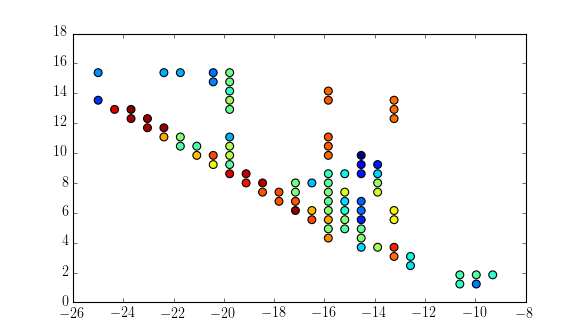

In [163]:
plt.figure()
plt.scatter(np.array(sta6_o3['x'])[i6o3[1]],np.array(sta6_o3['y'])[i6o3[0]],50,c=sta6_o3['mean'].data[i6o3[0],i6o3[1]].flatten())

<IPython.core.display.Javascript object>


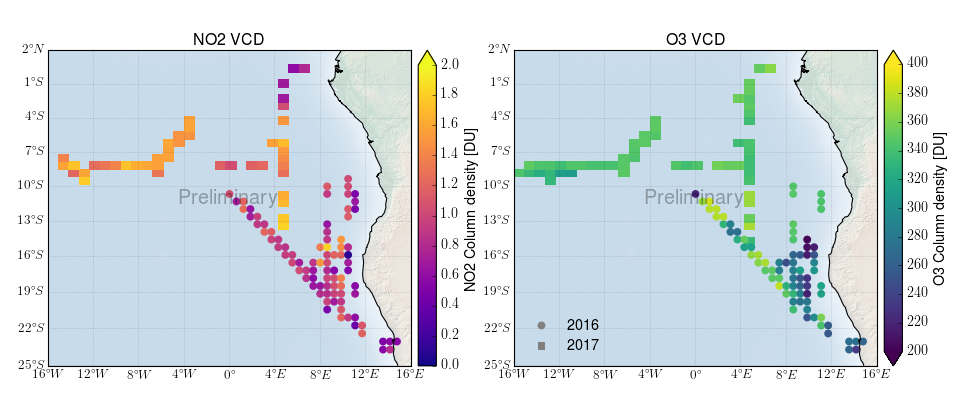

In [185]:
fig,ax = plt.subplots(1,2,figsize=(12,5))
ax = ax.flatten()
ax1 = ax[0]
#ax1 = plt.subplot(1,2,1)
m = mapfig(ax=ax1)

mx,my = m(sta_no2['y'],sta_no2['x'])
p = ax1.pcolor(mx,my,sta_no2['mean'],vmin=0.0,vmax=2.0,cmap='plasma')
m6x,m6y = m(sta6_no2['y'],sta6_no2['x'])
p2 = ax1.scatter(np.array(m6x)[i6no2[1]],np.array(m6y)[i6no2[0]],50,c=sta6_no2['mean'].data[i6no2[0],i6no2[1]].flatten(),
               marker='o',edgecolor='None',cmap='plasma',vmin=0.0,vmax=2.0)
prelim()
ax1.set_title('NO2 VCD')
cb = m.colorbar(p,extend='max')
cb.set_label('NO2 Column density [DU]')

ax2 = ax[1]
#ax2 = plt.subplot(1,2,2)
m2 = mapfig(ax=ax2)
mxx,myy = m2(sta_o3['y'],sta_o3['x'])
p = ax2.pcolor(mxx,myy,sta_o3['mean'],vmin=200.0,vmax=400,cmap='viridis')
m6xx,m6yy = m(sta6_o3['y'],sta6_o3['x'])
p2 = ax2.scatter(np.array(m6xx)[i6o3[1]],np.array(m6yy)[i6o3[0]],
            50,c=sta6_o3['mean'].data[i6o3[0],i6o3[1]].flatten(),
#p2 = ax2.scatter(m6xx,m6yy,50,c=sta6_o3['mean'].data[i6o3[0],i6o3[1]],
               marker='o',edgecolor='None',cmap='viridis',vmin=200.0,vmax=400)
prelim()
ax2.set_title('O3 VCD')
cb = m2.colorbar(p,extend='both')
cb.set_label('O3 Column density [DU]')

#sizes = [10,100,500,1500]
labels = ['2016','2017']
points = [ax2.scatter([], [], s=50, c='grey',marker='o',edgecolor='None'),
          ax2.scatter([], [], s=50, c='grey',marker='s',edgecolor='None')]
plt.legend(points, labels, scatterpoints=1,frameon=False,loc='lower left')
    
#plt.suptitle('Above cloud Angstrom of 470 - 865 nm\n')
plt.subplots_adjust(left=0.05, right=0.94, top=0.9, bottom=0.06)

plt.savefig(fp+'plot_2017/ORACLES2017_4STAR_stats_O3_NO2_actualmap.png',
            transparent=True,dpi=500)